### Import libraries



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data Generation 


In [18]:
## Data given in a file. * Open , read, prepocess and then save in .npz format

observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10, 10, size= (observations,1))

generated_input  = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,size =(observations,1))

generated_target = 2*xs -3*zs +5 + noise 



np.savez('TF_intro',inputs= generated_input, target=generated_target)

## A method for saving n dimentional array in .npz format   ## np.savez('filename',arrays)

### Solving with tensorflow


In [19]:
input_size= 2
output_size = 1

### Model Outline 


In [20]:
## creating tensorflow object 

inputs = tf.placeholder(tf.float32,[None,input_size]) 
## placeholder is the place where we place the data ## None means -> we need not specify the dimention of the data

target = tf.placeholder(tf.float32,[None,output_size])

weights= tf.Variable(tf.random_uniform([input_size,output_size],minval = -0.1, maxval= 0.1))

biases = tf.Variable(tf.random_uniform([output_size],minval= -0.1, maxval= 0.1))

outputs= tf.matmul(inputs,weights) + biases  

### Objective function and optimization method


In [21]:
mean_loss = tf.losses.mean_squared_error(labels= target, predictions = outputs ) / 2.

optimize = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(mean_loss)


## preparing for execution
sess = tf.InteractiveSession()   ## Training happens in InteractiveSession()

### Initialize Variables

In [22]:
initializer = tf.global_variables_initializer()  ## All tensor objects(weights,baises) marked as variable are initialized by this method

sess.run(initializer)

### Loading Trainig data from .npz file


In [23]:
training_data = np.load('TF_intro.npz')

### Learning 


In [24]:
## TensorFlow feed_dict: Use feed_dict To Feed Values To TensorFlow Placeholders

for e in range(100) :
    _,curr_loss = sess.run([optimize,mean_loss],feed_dict = {inputs : training_data['inputs'],target : training_data['target'] })
    
    print(curr_loss)

232.40225
121.04388
67.14642
39.533646
24.719477
16.457052
11.676777
8.799868
6.987375
5.7832823
4.9356837
4.3036103
3.807166
3.4003813
3.056269
2.7585473
2.4970138
2.2649713
2.0577738
1.8720139
1.7050476
1.5547378
1.419289
1.297156
1.1869882
1.0875907
0.99789685
0.91695285
0.8439
0.77796715
0.71845984
0.6647496
0.61627287
0.5725185
0.53302646
0.49738193
0.46520942
0.43617138
0.40996155
0.38630557
0.36495352
0.34568128
0.32828674
0.3125865
0.29841608
0.2856253
0.27408117
0.2636613
0.25425646
0.24576785
0.2381063
0.23119107
0.22494937
0.21931557
0.21423075
0.20964114
0.20549875
0.2017598
0.19838506
0.19533908
0.19258997
0.1901085
0.18786873
0.1858472
0.18402272
0.18237582
0.1808894
0.17954773
0.17833675
0.17724383
0.17625731
0.17536694
0.17456323
0.17383784
0.1731831
0.17259218
0.17205882
0.1715774
0.17114288
0.17075068
0.17039672
0.17007715
0.16978875
0.16952844
0.16929355
0.1690815
0.16889013
0.16871741
0.16856144
0.16842072
0.16829368
0.16817905
0.16807556
0.16798212
0.16789784
0.167

### Plotting data


Text(0, 0.5, 'Target')

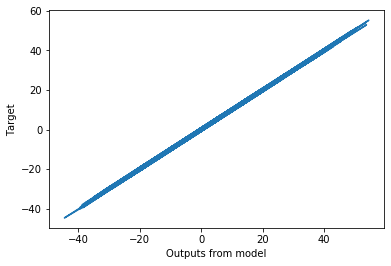

In [33]:
out = sess.run([outputs],feed_dict = {inputs : training_data['inputs'] })

plt.plot( np.squeeze(out), np.squeeze(training_data['target']))

plt.xlabel('Outputs from model')
plt.ylabel('Target')